# Week9

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
joined_drop = pd.read_pickle('../data/week8.pkl')
joined_drop.head()

,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color,standardized_size,standardized_style
0,8936935,9.58,6.00,P,1,24.0,24.00,3592413641,WHEATNUBU,L,1,914938,KIDS HEA,Other,Standard Sizes,Other
1,8940963,4.31,2.75,P,1,11.0,8.25,005U61516,GREYHE,L,3,4012768,TOMMY HI,Grey,Standard Sizes,Other
2,8944045,28.05,17.00,P,1,68.0,29.99,CC412,MULTI,M,1,8043525,KORET OF,Multi,Standard Sizes,Other
3,8944045,25.00,14.50,P,1,58.0,29.00,CC412,MULTI,M,1,8043525,KORET OF,Multi,Standard Sizes,Other
4,8972921,14.72,17.50,P,1,35.0,35.00,TPILTRAQL,TERRA,BOU PIL,2,619402,STATUS Q,Other,Standard Sizes,Other


In [3]:
grouped_data = joined_drop.groupby('sku')['retail'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='retail', ascending=False)
sorted_data

,sku,retail
45338,994478,47677.00
23027,5528349,35090.00
32307,7388142,26491.00
12551,3524026,23023.00
22855,5494617,19221.00
...,...,...
6024,224210,0.02
3963,1831106,0.01
34764,7858235,0.00
7289,249386,0.00


## Feature Engineering

we decide to select the following features:<br>
and they could be divided into 2 categories

categorical:
- standardized_style
- standardized_color
- standardized_size
- vendor
- brand

numerical:
- retail price
- packsize

In [4]:
joined_drop['vendor'].value_counts() 

vendor
5511283    39210
113645     16114
13031       6370
3626213     5331
13396       4196
           ...  
21131          1
11536          1
8016222        1
2913323        1
1713319        1
Name: count, Length: 932, dtype: int64

In [5]:
len(joined_drop['vendor'].value_counts())

932

In [6]:
joined_drop['brand'].value_counts()

brand
CLINIQUE    39210
LANCOME     16942
CABERNET    14782
LIZ CLAI     8889
LEVI STR     5638
            ...  
ADG/DESI        1
SUMMER S        1
WINSOME         1
BROOKINS        1
CONIFER         1
Name: count, Length: 678, dtype: int64

standardize retail price and packsize

In [8]:
# StandardScaler will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1.
scaler = StandardScaler()

# Scale the 'retail' and 'packsize' columns
joined_drop[['retail', 'packsize']] = scaler.fit_transform(joined_drop[['retail', 'packsize']])

In [9]:
joined_drop[['retail','packsize']]

,retail,packsize
0,-0.603488,-0.225073
1,-0.730408,0.081489
2,-0.173912,-0.225073
3,-0.271543,-0.225073
4,-0.154386,-0.071792
...,...,...
220727,3.047903,-0.225073
220728,3.047903,-0.225073
220729,3.047903,-0.225073
220730,3.047903,-0.225073


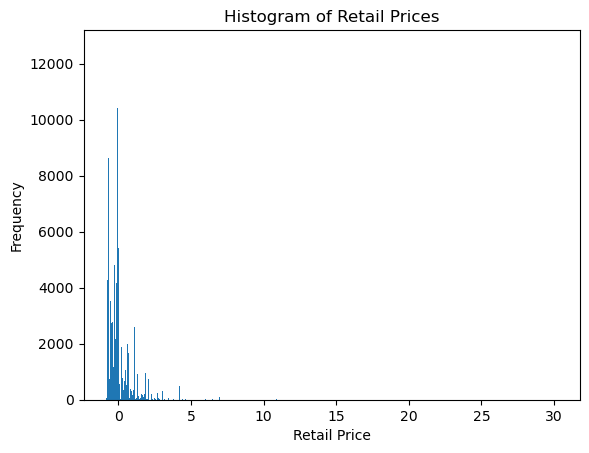

In [10]:
# Create a histogram for the 'retail' column
plt.hist(joined_drop['retail'], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

I don't think we need to drop ourliers here because it is normal that Dillard sells a wide range of packsize and retail prices.

Now 'retail' and 'packsize' have been standardized.

proceed with only selected features for x matrix

In [19]:
joined_drop.stype.value_counts()

stype
P    211919
R      8357
Name: count, dtype: int64

In [20]:
return_percentage=(8357/211919)*100
return_percentage

3.9434878420528596

In [21]:
joined_drop.head()

,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color,standardized_size,standardized_style
0,8936935,9.58,-0.603488,P,1,24.0,24.00,3592413641,WHEATNUBU,L,-0.225073,914938,KIDS HEA,Other,Standard Sizes,Other
1,8940963,4.31,-0.730408,P,1,11.0,8.25,005U61516,GREYHE,L,0.081489,4012768,TOMMY HI,Grey,Standard Sizes,Other
2,8944045,28.05,-0.173912,P,1,68.0,29.99,CC412,MULTI,M,-0.225073,8043525,KORET OF,Multi,Standard Sizes,Other
3,8944045,25.00,-0.271543,P,1,58.0,29.00,CC412,MULTI,M,-0.225073,8043525,KORET OF,Multi,Standard Sizes,Other
4,8972921,14.72,-0.154386,P,1,35.0,35.00,TPILTRAQL,TERRA,BOU PIL,-0.071792,619402,STATUS Q,Other,Standard Sizes,Other


Since we want to investigate whether customer would return or purchase a product based on its features, we must make this sample into a balanced dataset first, we decide to use SMOTE - Synthetic Minority Over-sampling Technique to make it into a balanced dataset.

The regression would focus on whether the product would be returned or not and it could further predict some unknow data. 

Then, we move to K-means to decide What products features would be returned most if they are returned. If they are sold, what product features would be sold best.


regression outline:<br>
y:stype (P or R)<br>
x matrix: retail price, style, standardized_color, standardized_size,packsize, vendor, brand

In [22]:
# save data to pickle for later processings
joined_drop.to_pickle('../data/week9.pkl')